#**predictive model for forecasting demand and supply information of top crops**

#Dataset 

In [1]:
import pandas as pd
df = pd.read_csv('finalised_dataset.csv',na_values='=')
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1,20.770894,2.068260,1014.863796,21.947147,loamy,56.070,0.000,0.000,1113.0,1113.000000
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600,20.160426,1.976480,1015.193528,20.643237,sandy,9.000,9.000,0.000,6300.0,0.357955
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100,21.998299,2.000524,1014.184607,21.422312,clay,0.000,0.000,0.000,152800.0,0.557461
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800,21.776377,2.019750,1015.053118,21.810567,chalky,38.250,38.250,38.250,18600.0,0.455882
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900,20.075734,1.974351,1015.170238,21.930206,clay,0.000,23.184,0.000,1100.0,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000,21.635879,2.000060,1014.302213,20.060662,silty,7.840,7.840,0.000,3300.0,0.825000
12624,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300,21.709611,2.053609,1015.803912,21.263478,silt,7.504,18.760,7.504,200.0,0.153846
12625,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0,0.920962
12626,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400,21.569380,2.004421,1013.989125,21.835158,chalky,2.896,3.620,0.000,11500.0,1.223404


In [2]:
df=df.drop('Yield', axis = 1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12628 entries, 0 to 12627
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      12628 non-null  int64  
 1   state_names     12628 non-null  object 
 2   district_names  12628 non-null  object 
 3   crop_year       12628 non-null  int64  
 4   season_names    12628 non-null  object 
 5   crop_names      12628 non-null  object 
 6   area            12628 non-null  int64  
 7   temperature     12628 non-null  float64
 8   wind_speed      12628 non-null  float64
 9   pressure        12628 non-null  float64
 10  humidity        12628 non-null  float64
 11  soil_type       12628 non-null  object 
 12  N               12628 non-null  float64
 13  P               12628 non-null  float64
 14  K               12628 non-null  float64
 15  production      12496 non-null  float64
dtypes: float64(8), int64(3), object(5)
memory usage: 1.5+ MB


In [4]:
df.columns


Index(['Unnamed: 0', 'state_names', 'district_names', 'crop_year',
       'season_names', 'crop_names', 'area', 'temperature', 'wind_speed',
       'pressure', 'humidity', 'soil_type', 'N', 'P', 'K', 'production'],
      dtype='object')

##Reducing Data to One State for Ease

In [5]:
df = df[df['state_names'] == "Maharashtra"]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12628 entries, 0 to 12627
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      12628 non-null  int64  
 1   state_names     12628 non-null  object 
 2   district_names  12628 non-null  object 
 3   crop_year       12628 non-null  int64  
 4   season_names    12628 non-null  object 
 5   crop_names      12628 non-null  object 
 6   area            12628 non-null  int64  
 7   temperature     12628 non-null  float64
 8   wind_speed      12628 non-null  float64
 9   pressure        12628 non-null  float64
 10  humidity        12628 non-null  float64
 11  soil_type       12628 non-null  object 
 12  N               12628 non-null  float64
 13  P               12628 non-null  float64
 14  K               12628 non-null  float64
 15  production      12496 non-null  float64
dtypes: float64(8), int64(3), object(5)
memory usage: 1.6+ MB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12628 entries, 0 to 12627
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      12628 non-null  int64  
 1   state_names     12628 non-null  object 
 2   district_names  12628 non-null  object 
 3   crop_year       12628 non-null  int64  
 4   season_names    12628 non-null  object 
 5   crop_names      12628 non-null  object 
 6   area            12628 non-null  int64  
 7   temperature     12628 non-null  float64
 8   wind_speed      12628 non-null  float64
 9   pressure        12628 non-null  float64
 10  humidity        12628 non-null  float64
 11  soil_type       12628 non-null  object 
 12  N               12628 non-null  float64
 13  P               12628 non-null  float64
 14  K               12628 non-null  float64
 15  production      12496 non-null  float64
dtypes: float64(8), int64(3), object(5)
memory usage: 1.6+ MB


In [7]:
df.isnull().sum()

Unnamed: 0          0
state_names         0
district_names      0
crop_year           0
season_names        0
crop_names          0
area                0
temperature         0
wind_speed          0
pressure            0
humidity            0
soil_type           0
N                   0
P                   0
K                   0
production        132
dtype: int64

In [8]:
df.head(6)

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1,20.770894,2.068260,1014.863796,21.947147,loamy,56.07,0.000,0.000,1113.0
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600,20.160426,1.976480,1015.193528,20.643237,sandy,9.00,9.000,0.000,6300.0
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100,21.998299,2.000524,1014.184607,21.422312,clay,0.00,0.000,0.000,152800.0
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800,21.776377,2.019750,1015.053118,21.810567,chalky,38.25,38.250,38.250,18600.0
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900,20.075734,1.974351,1015.170238,21.930206,clay,0.00,23.184,0.000,1100.0
5,125196,Maharashtra,AHMEDNAGAR,1997,Kharif,Maize,4400,21.642354,2.075066,1015.702482,21.571403,sandy,5.64,14.664,14.664,4700.0


###Making Yield Column

In [9]:
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1,20.770894,2.068260,1014.863796,21.947147,loamy,56.070,0.000,0.000,1113.0
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600,20.160426,1.976480,1015.193528,20.643237,sandy,9.000,9.000,0.000,6300.0
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100,21.998299,2.000524,1014.184607,21.422312,clay,0.000,0.000,0.000,152800.0
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800,21.776377,2.019750,1015.053118,21.810567,chalky,38.250,38.250,38.250,18600.0
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900,20.075734,1.974351,1015.170238,21.930206,clay,0.000,23.184,0.000,1100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000,21.635879,2.000060,1014.302213,20.060662,silty,7.840,7.840,0.000,3300.0
12624,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300,21.709611,2.053609,1015.803912,21.263478,silt,7.504,18.760,7.504,200.0
12625,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0
12626,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400,21.569380,2.004421,1013.989125,21.835158,chalky,2.896,3.620,0.000,11500.0


##Corelation Heatmap

C:\Users\jadha\AppData\Local\Temp\ipykernel_19324\3682067454.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  C_mat = df.corr()


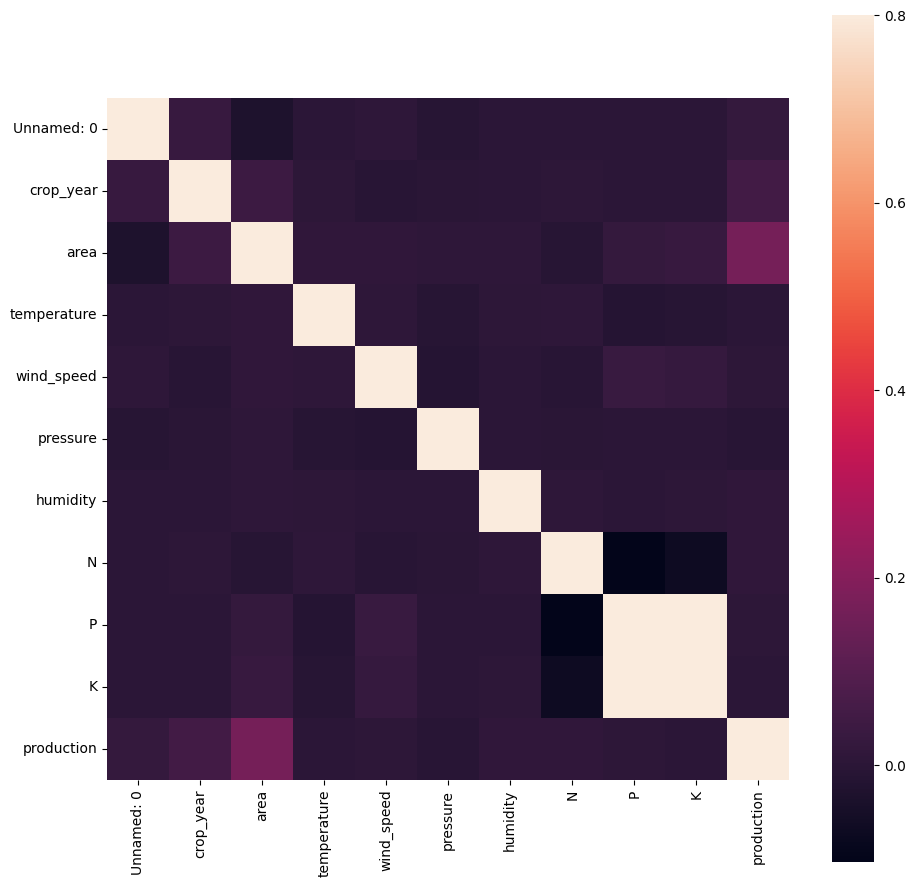

In [10]:
import matplotlib.pyplot as plt
import seaborn as sb

C_mat = df.corr()
fig = plt.figure(figsize = (11,11))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

##Taking Data only after 2004 because the data after 2004 is affecting the rersult alot

In [11]:
df = df[df['crop_year']>=2004]
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production
212,125403,Maharashtra,AHMEDNAGAR,2004,Kharif,Arhar/Tur,12200,20.768143,2.002031,1013.280471,20.427922,peaty,10.500,27.300,27.300,4800.0
213,125404,Maharashtra,AHMEDNAGAR,2004,Kharif,Bajra,240500,20.722713,2.105239,1015.061641,20.468584,silty,39.720,105.920,52.960,143400.0
214,125405,Maharashtra,AHMEDNAGAR,2004,Kharif,Groundnut,5300,21.419190,2.046843,1015.770055,21.836158,peaty,8.008,8.008,0.000,3900.0
215,125406,Maharashtra,AHMEDNAGAR,2004,Kharif,Jowar,100,20.425919,2.024060,1013.971163,21.028403,sandy,5.824,14.560,5.824,100.0
216,125407,Maharashtra,AHMEDNAGAR,2004,Kharif,Maize,11400,20.823344,1.989898,1015.453191,20.340815,silty,0.000,0.000,0.000,14000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000,21.635879,2.000060,1014.302213,20.060662,silty,7.840,7.840,0.000,3300.0
12624,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300,21.709611,2.053609,1015.803912,21.263478,silt,7.504,18.760,7.504,200.0
12625,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0
12626,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400,21.569380,2.004421,1013.989125,21.835158,chalky,2.896,3.620,0.000,11500.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7255 entries, 212 to 12627
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7255 non-null   int64  
 1   state_names     7255 non-null   object 
 2   district_names  7255 non-null   object 
 3   crop_year       7255 non-null   int64  
 4   season_names    7255 non-null   object 
 5   crop_names      7255 non-null   object 
 6   area            7255 non-null   int64  
 7   temperature     7255 non-null   float64
 8   wind_speed      7255 non-null   float64
 9   pressure        7255 non-null   float64
 10  humidity        7255 non-null   float64
 11  soil_type       7255 non-null   object 
 12  N               7255 non-null   float64
 13  P               7255 non-null   float64
 14  K               7255 non-null   float64
 15  production      7143 non-null   float64
dtypes: float64(8), int64(3), object(5)
memory usage: 963.6+ KB


##converting data to numerical form

In [13]:
df = df.join(pd.get_dummies(df['district_names']))
df = df.join(pd.get_dummies(df['season_names']))
df = df.join(pd.get_dummies(df['crop_names']))
df = df.join(pd.get_dummies(df['state_names']))
df = df.join(pd.get_dummies(df['soil_type']))
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,...,Wheat,other oilseeds,Maharashtra,chalky,clay,loamy,peaty,sandy,silt,silty
212,125403,Maharashtra,AHMEDNAGAR,2004,Kharif,Arhar/Tur,12200,20.768143,2.002031,1013.280471,...,0,0,1,0,0,0,1,0,0,0
213,125404,Maharashtra,AHMEDNAGAR,2004,Kharif,Bajra,240500,20.722713,2.105239,1015.061641,...,0,0,1,0,0,0,0,0,0,1
214,125405,Maharashtra,AHMEDNAGAR,2004,Kharif,Groundnut,5300,21.419190,2.046843,1015.770055,...,0,0,1,0,0,0,1,0,0,0
215,125406,Maharashtra,AHMEDNAGAR,2004,Kharif,Jowar,100,20.425919,2.024060,1013.971163,...,0,0,1,0,0,0,0,1,0,0
216,125407,Maharashtra,AHMEDNAGAR,2004,Kharif,Maize,11400,20.823344,1.989898,1015.453191,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000,21.635879,2.000060,1014.302213,...,0,0,1,0,0,0,0,0,0,1
12624,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300,21.709611,2.053609,1015.803912,...,0,0,1,0,0,0,0,0,1,0
12625,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100,21.851730,2.027476,1014.031903,...,1,0,1,0,0,0,0,1,0,0
12626,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400,21.569380,2.004421,1013.989125,...,0,0,1,1,0,0,0,0,0,0


In [14]:
df['Yield'] = df['production']/df['area']
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,...,other oilseeds,Maharashtra,chalky,clay,loamy,peaty,sandy,silt,silty,Yield
212,125403,Maharashtra,AHMEDNAGAR,2004,Kharif,Arhar/Tur,12200,20.768143,2.002031,1013.280471,...,0,1,0,0,0,1,0,0,0,0.393443
213,125404,Maharashtra,AHMEDNAGAR,2004,Kharif,Bajra,240500,20.722713,2.105239,1015.061641,...,0,1,0,0,0,0,0,0,1,0.596258
214,125405,Maharashtra,AHMEDNAGAR,2004,Kharif,Groundnut,5300,21.419190,2.046843,1015.770055,...,0,1,0,0,0,1,0,0,0,0.735849
215,125406,Maharashtra,AHMEDNAGAR,2004,Kharif,Jowar,100,20.425919,2.024060,1013.971163,...,0,1,0,0,0,0,1,0,0,1.000000
216,125407,Maharashtra,AHMEDNAGAR,2004,Kharif,Maize,11400,20.823344,1.989898,1015.453191,...,0,1,0,0,0,0,0,0,1,1.228070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000,21.635879,2.000060,1014.302213,...,0,1,0,0,0,0,0,0,1,0.825000
12624,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300,21.709611,2.053609,1015.803912,...,0,1,0,0,0,0,0,1,0,0.153846
12625,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100,21.851730,2.027476,1014.031903,...,0,1,0,0,0,0,1,0,0,0.920962
12626,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400,21.569380,2.004421,1013.989125,...,0,1,1,0,0,0,0,0,0,1.223404


In [15]:
df = df.drop('production', axis=1)

##Dropping Unecessory Columns

In [16]:
df=df.drop('district_names', axis=1)
df = df.drop('season_names',axis=1)
df = df.drop('crop_names',axis=1)




In [17]:
df = df.drop('state_names', axis=1)
df = df.drop('soil_type', axis=1)
df

,Unnamed: 0,crop_year,area,temperature,wind_speed,pressure,humidity,N,P,K,...,other oilseeds,Maharashtra,chalky,clay,loamy,peaty,sandy,silt,silty,Yield
212,125403,2004,12200,20.768143,2.002031,1013.280471,20.427922,10.500,27.300,27.300,...,0,1,0,0,0,1,0,0,0,0.393443
213,125404,2004,240500,20.722713,2.105239,1015.061641,20.468584,39.720,105.920,52.960,...,0,1,0,0,0,0,0,0,1,0.596258
214,125405,2004,5300,21.419190,2.046843,1015.770055,21.836158,8.008,8.008,0.000,...,0,1,0,0,0,1,0,0,0,0.735849
215,125406,2004,100,20.425919,2.024060,1013.971163,21.028403,5.824,14.560,5.824,...,0,1,0,0,0,0,1,0,0,1.000000
216,125407,2004,11400,20.823344,1.989898,1015.453191,20.340815,0.000,0.000,0.000,...,0,1,0,0,0,0,0,0,1,1.228070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,2014,4000,21.635879,2.000060,1014.302213,20.060662,7.840,7.840,0.000,...,0,1,0,0,0,0,0,0,1,0.825000
12624,137815,2014,1300,21.709611,2.053609,1015.803912,21.263478,7.504,18.760,7.504,...,0,1,0,0,0,0,0,1,0,0.153846
12625,137816,2014,29100,21.851730,2.027476,1014.031903,20.059945,0.000,0.000,0.000,...,0,1,0,0,0,0,1,0,0,0.920962
12626,137817,2014,9400,21.569380,2.004421,1013.989125,21.835158,2.896,3.620,0.000,...,0,1,1,0,0,0,0,0,0,1.223404


##Preprocessing

In [18]:
from sklearn import preprocessing

In [19]:

# Create x, where x the 'scores' column's values as floats
x = df[['area']].values.astype(float)
x
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
#df_normalized = pd.DataFrame(x_scaled)
x_scaled

df['area'] = x_scaled
df

,Unnamed: 0,crop_year,area,temperature,wind_speed,pressure,humidity,N,P,K,...,other oilseeds,Maharashtra,chalky,clay,loamy,peaty,sandy,silt,silty,Yield
212,125403,2004,0.017150,20.768143,2.002031,1013.280471,20.427922,10.500,27.300,27.300,...,0,1,0,0,0,1,0,0,0,0.393443
213,125404,2004,0.338112,20.722713,2.105239,1015.061641,20.468584,39.720,105.920,52.960,...,0,1,0,0,0,0,0,0,1,0.596258
214,125405,2004,0.007450,21.419190,2.046843,1015.770055,21.836158,8.008,8.008,0.000,...,0,1,0,0,0,1,0,0,0,0.735849
215,125406,2004,0.000139,20.425919,2.024060,1013.971163,21.028403,5.824,14.560,5.824,...,0,1,0,0,0,0,1,0,0,1.000000
216,125407,2004,0.016026,20.823344,1.989898,1015.453191,20.340815,0.000,0.000,0.000,...,0,1,0,0,0,0,0,0,1,1.228070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,2014,0.005622,21.635879,2.000060,1014.302213,20.060662,7.840,7.840,0.000,...,0,1,0,0,0,0,0,0,1,0.825000
12624,137815,2014,0.001826,21.709611,2.053609,1015.803912,21.263478,7.504,18.760,7.504,...,0,1,0,0,0,0,0,1,0,0.153846
12625,137816,2014,0.040910,21.851730,2.027476,1014.031903,20.059945,0.000,0.000,0.000,...,0,1,0,0,0,0,1,0,0,0.920962
12626,137817,2014,0.013214,21.569380,2.004421,1013.989125,21.835158,2.896,3.620,0.000,...,0,1,1,0,0,0,0,0,0,1.223404


In [20]:
df.head()

,Unnamed: 0,crop_year,area,temperature,wind_speed,pressure,humidity,N,P,K,...,other oilseeds,Maharashtra,chalky,clay,loamy,peaty,sandy,silt,silty,Yield
212,125403,2004,0.017150,20.768143,2.002031,1013.280471,20.427922,10.500,27.300,27.300,...,0,1,0,0,0,1,0,0,0,0.393443
213,125404,2004,0.338112,20.722713,2.105239,1015.061641,20.468584,39.720,105.920,52.960,...,0,1,0,0,0,0,0,0,1,0.596258
214,125405,2004,0.007450,21.419190,2.046843,1015.770055,21.836158,8.008,8.008,0.000,...,0,1,0,0,0,1,0,0,0,0.735849
215,125406,2004,0.000139,20.425919,2.024060,1013.971163,21.028403,5.824,14.560,5.824,...,0,1,0,0,0,0,1,0,0,1.000000
216,125407,2004,0.016026,20.823344,1.989898,1015.453191,20.340815,0.000,0.000,0.000,...,0,1,0,0,0,0,0,0,1,1.228070


### Filling Empty Values With Mean

In [21]:
df = df.fillna(df.mean())

##Train and Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
a=df

In [24]:
b = df['Yield']
#a = df.drop('Yield', axis = 1)



In [25]:
c = df.drop('Unnamed: 0', axis = 1)

In [26]:
a=c.drop('Yield', axis = 1)

In [27]:
len(a.columns)

81

In [28]:
a.columns

Index(['crop_year', 'area', 'temperature', 'wind_speed', 'pressure',
       'humidity', 'N', 'P', 'K', 'AHMEDNAGAR', 'AKOLA', 'AMRAVATI',
       'AURANGABAD', 'BEED', 'BHANDARA', 'BULDHANA', 'CHANDRAPUR', 'DHULE',
       'GADCHIROLI', 'GONDIA', 'HINGOLI', 'JALGAON', 'JALNA', 'KOLHAPUR',
       'LATUR', 'NAGPUR', 'NANDED', 'NANDURBAR', 'NASHIK', 'OSMANABAD',
       'PALGHAR', 'PARBHANI', 'PUNE', 'RAIGAD', 'RATNAGIRI', 'SANGLI',
       'SATARA', 'SINDHUDURG', 'SOLAPUR', 'THANE', 'WARDHA', 'WASHIM',
       'YAVATMAL', 'Kharif     ', 'Rabi       ', 'Summer     ', 'Whole Year ',
       'Arhar/Tur', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Gram',
       'Groundnut', 'Jowar', 'Linseed', 'Maize', 'Moong(Green Gram)',
       'Niger seed', 'Other  Rabi pulses', 'Other Cereals & Millets',
       'Other Kharif pulses', 'Ragi', 'Rapeseed &Mustard', 'Rice', 'Safflower',
       'Sesamum', 'Soyabean', 'Sugarcane', 'Sunflower', 'Tobacco', 'Urad',
       'Wheat', 'other oilseeds', 'Maharashtra', 'chalky

In [29]:
features_list=['crop_year', 'area', 'temperature', 'wind_speed', 'pressure',
       'humidity', 'N', 'P', 'K', 'AHMEDNAGAR', 'AKOLA', 'AMRAVATI',
       'AURANGABAD', 'BEED', 'BHANDARA', 'BULDHANA', 'CHANDRAPUR', 'DHULE',
       'GADCHIROLI', 'GONDIA', 'HINGOLI', 'JALGAON', 'JALNA', 'KOLHAPUR',
       'LATUR', 'NAGPUR', 'NANDED', 'NANDURBAR', 'NASHIK', 'OSMANABAD',
       'PALGHAR', 'PARBHANI', 'PUNE', 'RAIGAD', 'RATNAGIRI', 'SANGLI',
       'SATARA', 'SINDHUDURG', 'SOLAPUR', 'THANE', 'WARDHA', 'WASHIM',
       'YAVATMAL', 'Kharif     ', 'Rabi       ', 'Summer     ', 'Whole Year ',
       'Arhar/Tur', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Gram',
       'Groundnut', 'Jowar', 'Linseed', 'Maize', 'Moong(Green Gram)',
       'Niger seed', 'Other  Rabi pulses', 'Other Cereals & Millets',
       'Other Kharif pulses', 'Ragi', 'Rapeseed &Mustard', 'Rice', 'Safflower',
       'Sesamum', 'Soyabean', 'Sugarcane', 'Sunflower', 'Tobacco', 'Urad',
       'Wheat', 'other oilseeds', 'Maharashtra', 'chalky', 'clay', 'loamy',
       'peaty', 'sandy', 'silt', 'silty']

In [30]:
features_list123=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

len(features_list123)

81

In [31]:
len(features_list)

81

In [32]:
a=df[features_list]

In [33]:
a.head()

,crop_year,area,temperature,wind_speed,pressure,humidity,N,P,K,AHMEDNAGAR,...,Wheat,other oilseeds,Maharashtra,chalky,clay,loamy,peaty,sandy,silt,silty
212,2004,0.017150,20.768143,2.002031,1013.280471,20.427922,10.500,27.300,27.300,1,...,0,0,1,0,0,0,1,0,0,0
213,2004,0.338112,20.722713,2.105239,1015.061641,20.468584,39.720,105.920,52.960,1,...,0,0,1,0,0,0,0,0,0,1
214,2004,0.007450,21.419190,2.046843,1015.770055,21.836158,8.008,8.008,0.000,1,...,0,0,1,0,0,0,1,0,0,0
215,2004,0.000139,20.425919,2.024060,1013.971163,21.028403,5.824,14.560,5.824,1,...,0,0,1,0,0,0,0,1,0,0
216,2004,0.016026,20.823344,1.989898,1015.453191,20.340815,0.000,0.000,0.000,1,...,0,0,1,0,0,0,0,0,0,1


In [34]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.3, random_state = 42)

print(a_train)
print(a_test)
print(b_train)
print(b_test)

       crop_year      area  temperature  wind_speed     pressure   humidity  \
8196        2008  0.058343    21.287581    2.066838  1014.904551  20.709584   
1674        2014  0.058764    21.080175    2.103093  1014.113752  20.359939   
7662        2005  0.013354    20.922660    2.022428  1013.501715  20.642090   
2732        2009  0.002389    20.331978    2.019252  1014.653555  21.467039   
12588       2012  0.083789    20.773241    2.099441  1013.971550  21.542199   
...          ...       ...          ...         ...          ...        ...   
6581        2014  0.000702    20.090749    1.983827  1013.157407  20.411220   
9120        2006  0.007731    21.544164    2.089016  1013.109528  21.377246   
9155        2008  0.003935    20.960905    2.006062  1013.565065  21.525920   
9319        2014  0.000420    21.965921    2.061763  1014.285744  21.873364   
1582        2010  0.015604    20.139821    2.106225  1013.705632  20.377305   

            N       P      K  AHMEDNAGAR  ...  Whea

In [35]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
a_train = sc.fit_transform(a_train)
a_test = sc.transform(a_test)

###Random Forest Regressor

In [37]:
   from sklearn.ensemble import RandomForestRegressor
   regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
   regr.fit(a_train, b_train)
   b_pred = regr.predict(a_test)

   from sklearn.metrics import mean_squared_error as mse
   from sklearn.metrics import mean_absolute_error as mae
   from sklearn.metrics import r2_score

   print('MSE =', mse(b_pred, b_test))
   print('MAE =', mae(b_pred, b_test))
   print('R2 Score =', r2_score(b_pred, b_test))

MSE = 7.671048879964048
MAE = 0.8953650873829122
R2 Score = 0.9589614680509005
